# IPL Score Prediction.

In [92]:
# Importing the Required Packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=13
pd.options.display.max_rows=200

### Importing the Data.

In [2]:
ipl=pd.read_csv('ipl.csv')
ipl.head(20)

,mid,date,venue,bat_team,bowl_team,batsman,...,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,...,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,1.3,11,0,8,0,222


In [3]:
# To check the Columns of the dataset
ipl.keys()

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

# EDA

### Pandas-Profiling.

In [4]:
from pandas_profiling import ProfileReport

In [5]:
profile=ProfileReport(ipl, title='Pandas Profiling report', explorative=True)

In [6]:
profile.to_widgets()

In [7]:
profile.to_file('IPL Pandas Profiling')

In [8]:
# To Check the Shape of the dataset 
ipl.shape

(76014, 15)

In [9]:
# To View Statistics of the dataset
ipl.describe(exclude=None)

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [10]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [11]:
# To Check the  Correlation between the features
ipl.corr()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.026470,-0.055220,0.002487,0.045320,-0.031886,0.033432,0.049975,0.096586
runs,0.026470,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,-0.055220,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.002487,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282
runs_last_5,0.045320,0.750565,0.242942,0.629374,1.000000,0.058672,0.675924,0.501475,0.368253
wickets_last_5,-0.031886,0.297768,0.693740,0.382850,0.058672,1.000000,-0.214576,-0.421250,-0.273475
striker,0.033432,0.594818,0.019712,0.477508,0.675924,-0.214576,1.000000,0.554439,0.381664
non-striker,0.049975,0.315422,-0.171962,0.236430,0.501475,-0.421250,0.554439,1.000000,0.293233
total,0.096586,0.254498,-0.337343,0.022282,0.368253,-0.273475,0.381664,0.293233,1.000000


In [12]:
# To Check if there are any missing values in the dataset.
ipl.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

<AxesSubplot:>

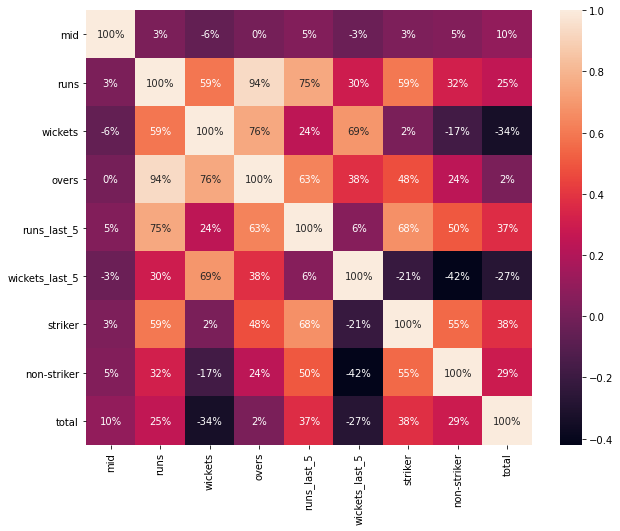

In [13]:
# To visualize the Correlation table for understanding its percentage coefficients.
plt.figure(figsize=(10,8))
sb.heatmap(ipl.corr(),annot=True,fmt='.0%')

In [14]:
# Correlation of features with respect to Target variable i.e "total"
ipl.corr()['total']

mid               0.096586
runs              0.254498
wickets          -0.337343
overs             0.022282
runs_last_5       0.368253
wickets_last_5   -0.273475
striker           0.381664
non-striker       0.293233
total             1.000000
Name: total, dtype: float64

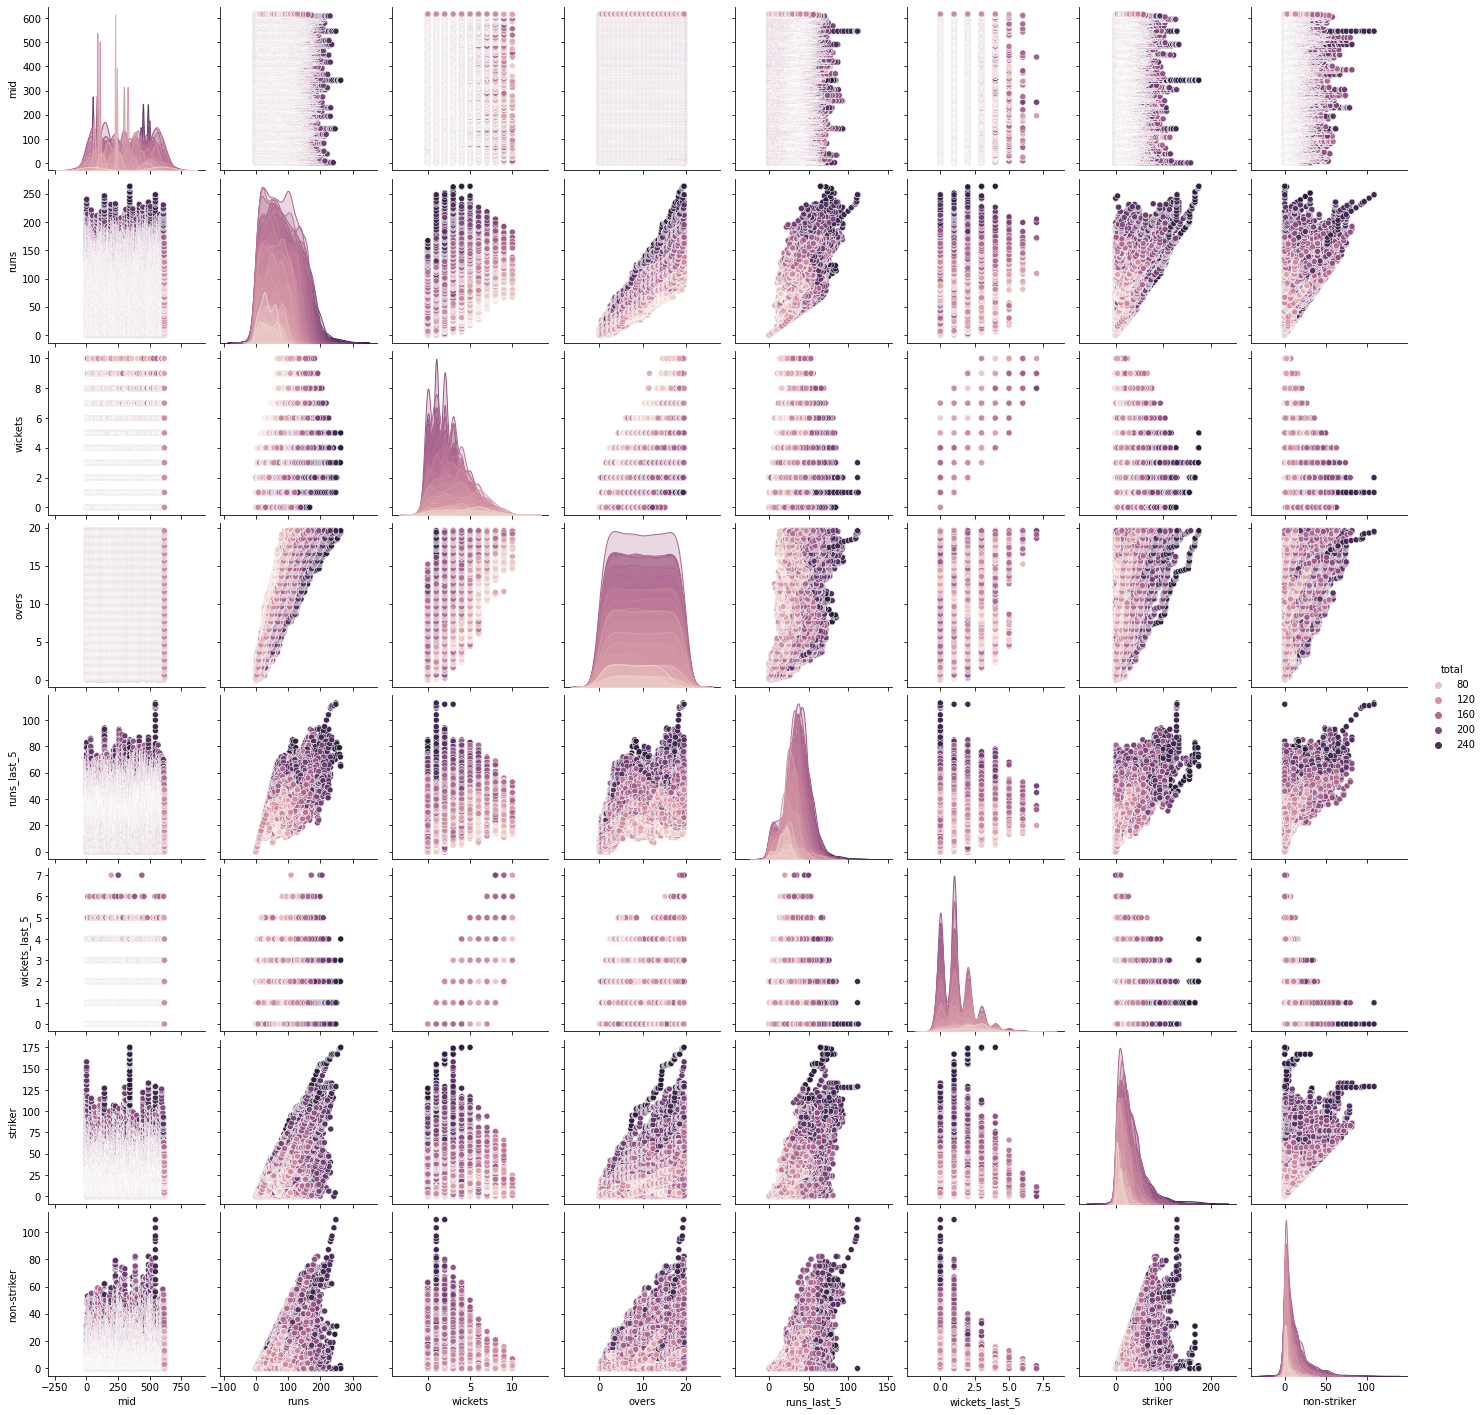

In [15]:
# To check a pairwise relationships in a dataset.
sb.pairplot(ipl,hue='total')

In [16]:
# To Find the number of unique values present in the each feature of the dataset.
ipl.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

## Features Exploration with Visualization.

In [17]:
ipl.mid.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

<AxesSubplot:xlabel='mid', ylabel='Density'>

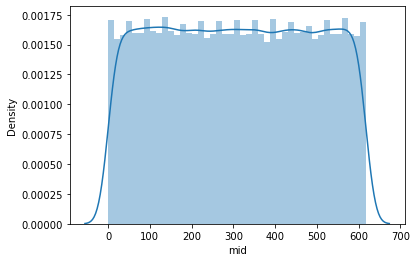

In [18]:
sb.distplot(ipl.mid)

In [19]:
ipl.date.unique()

array(['2008-04-18', '2008-04-19', '2008-04-20', '2008-04-21',
       '2008-04-22', '2008-04-23', '2008-04-24', '2008-04-25',
       '2008-04-26', '2008-04-27', '2008-04-28', '2008-04-29',
       '2008-04-30', '2008-05-01', '2008-05-02', '2008-05-25',
       '2008-05-03', '2008-05-04', '2008-05-05', '2008-05-06',
       '2008-05-07', '2008-05-08', '2008-05-09', '2008-05-28',
       '2008-05-10', '2008-05-11', '2008-05-12', '2008-05-13',
       '2008-05-14', '2008-05-15', '2008-05-16', '2008-05-17',
       '2008-05-18', '2008-05-19', '2008-05-20', '2008-05-21',
       '2008-05-23', '2008-05-24', '2008-05-26', '2008-05-27',
       '2008-05-30', '2008-05-31', '2008-06-01', '2009-04-18',
       '2009-04-19', '2009-04-20', '2009-04-22', '2009-04-23',
       '2009-04-24', '2009-04-25', '2009-04-26', '2009-04-27',
       '2009-04-28', '2009-04-29', '2009-04-30', '2009-05-01',
       '2009-05-02', '2009-05-03', '2009-05-04', '2009-05-05',
       '2009-05-06', '2009-05-07', '2009-05-08', '2009-

In [20]:
ipl.date.value_counts()

2010-03-25    257
2011-04-22    257
2012-05-20    256
2015-04-25    255
2010-04-11    254
             ... 
2014-05-02    103
2008-05-07    103
2008-05-16     98
2012-04-05     74
2015-05-13     63
Name: date, Length: 442, dtype: int64

In [21]:
ipl.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [22]:
ipl.bat_team.nunique()

14

In [23]:
ipl.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [24]:
ipl.bat_team.value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

<AxesSubplot:xlabel='bat_team', ylabel='count'>

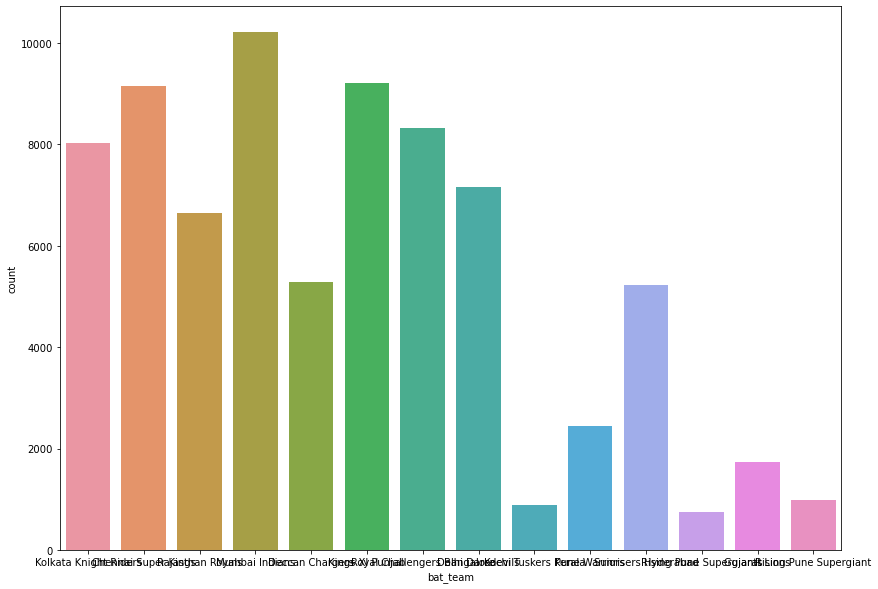

In [25]:
plt.figure(figsize=(14,10))
sb.countplot(ipl.bat_team)

In [26]:
ipl.bowl_team.nunique()

14

In [27]:
ipl.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [28]:
ipl.bowl_team.value_counts()

Delhi Daredevils               10245
Royal Challengers Bangalore     9661
Mumbai Indians                  9271
Kolkata Knight Riders           9211
Kings XI Punjab                 8405
Rajasthan Royals                7773
Chennai Super Kings             6497
Deccan Chargers                 3984
Sunrisers Hyderabad             3589
Pune Warriors                   3083
Gujarat Lions                   1970
Rising Pune Supergiant           962
Kochi Tuskers Kerala             736
Rising Pune Supergiants          627
Name: bowl_team, dtype: int64

In [29]:
ipl.batsman.nunique()

411

In [30]:
ipl.batsman.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'T Kohli',
       'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja',
       'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'AC Gilchrist',
       'Y Venugopal Rao', 'VVS Laxman', 'A Symonds', 'RG Sharma',
       'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh',
       'K Goel', 'JR Hopes', 'KC Sangakkara', 'DPMD Jayawardene',
       'Yuvraj Singh', 'IK Pathan', 'S Sohal', 'B Lee', 'PP Chawla',
       'WA Mota', 'Shahid Afridi', 'RR Sarwan', 'S Sreesanth',
       'VRV Singh', 'S Chanderpaul', 'R Dravid', 'LRPL Taylor',
       'JH Kallis', 'V Kohli', 'MV Boucher', 'P Kumar', 'SB Joshi',
       'Z Khan', 'R Vinay Kumar', 'WP Saha', 'LR Shukla', 'AB Ag

In [31]:
ipl.batsman.value_counts()

SK Raina         1921
V Kohli          1825
S Dhawan         1730
RG Sharma        1726
MS Dhoni         1584
                 ... 
YA Abdulla          1
NJ Rimmington       1
TM Srivastava       1
DT Patil            1
AF Milne            1
Name: batsman, Length: 411, dtype: int64

In [32]:
ipl.bowler.nunique()

329

In [33]:
ipl.bowler.value_counts()

Harbhajan Singh    1404
PP Chawla          1399
P Kumar            1386
SL Malinga         1333
UT Yadav           1304
                   ... 
AM Rahane             6
C Ganapathy           6
CK Kapugedera         6
DB Ravi Teja          6
SA Yadav              6
Name: bowler, Length: 329, dtype: int64

In [34]:
ipl.runs.nunique()

252

In [35]:
ipl.runs.value_counts()

1      895
0      808
5      697
2      649
4      643
      ... 
240      1
260      1
253      1
236      1
259      1
Name: runs, Length: 252, dtype: int64

In [36]:
ipl.wickets.nunique()

11

In [37]:
ipl.wickets.value_counts()

1     14900
0     14840
2     13927
3     11568
4      9124
5      5208
6      3334
7      1784
8       856
9       426
10       47
Name: wickets, dtype: int64

<AxesSubplot:xlabel='wickets', ylabel='count'>

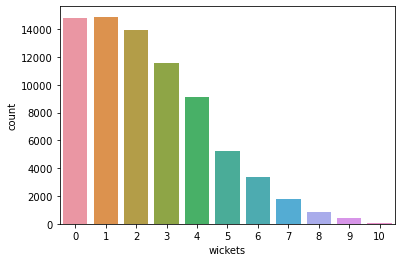

In [38]:
sb.countplot(ipl.wickets)

<AxesSubplot:xlabel='wickets', ylabel='Density'>

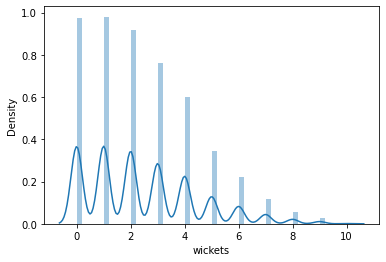

In [39]:
sb.distplot(ipl.wickets)

In [40]:
ipl.overs.nunique()

140

In [41]:
ipl.overs.value_counts()

0.1     655
0.4     652
1.1     650
2.3     649
3.5     649
1.2     648
1.4     648
0.2     646
5.2     645
1.3     645
1.5     644
5.1     644
18.1    644
2.2     644
4.3     642
0.3     642
3.4     641
4.4     641
6.5     640
8.4     640
3.3     640
4.2     640
0.5     640
2.5     640
16.5    639
6.4     639
2.4     638
4.5     638
9.5     638
8.3     637
7.4     636
2.1     636
4.1     636
5.4     636
11.1    635
6.3     635
17.4    635
15.5    635
12.4    634
5.3     634
7.5     634
16.1    634
8.2     634
6.2     634
6.1     634
5.5     634
3.1     633
15.2    633
15.1    633
9.2     633
14.3    633
7.2     632
12.3    632
7.3     632
16.2    632
9.1     632
14.4    632
13.4    632
12.5    632
7.1     631
17.2    631
3.2     631
13.3    631
13.5    631
14.2    630
12.1    630
11.5    630
10.2    630
17.3    629
17.5    629
16.3    629
17.1    629
10.4    629
18.4    628
14.1    628
10.1    628
12.2    628
8.1     628
9.3     628
18.3    627
15.3    627
8.5     627
13.2    626
13.1

<AxesSubplot:xlabel='overs', ylabel='Density'>

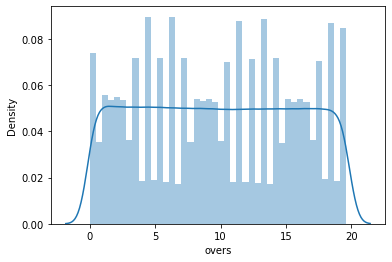

In [42]:
sb.distplot(ipl.overs)

In [43]:
ipl.runs_last_5.nunique()

102

In [44]:
ipl.runs_last_5.value_counts()

34     2408
33     2328
35     2317
36     2289
32     2281
37     2249
38     2200
31     2143
39     2134
29     2047
40     2008
30     1988
41     1961
28     1896
42     1872
27     1804
43     1773
26     1739
44     1671
45     1658
25     1535
46     1478
24     1390
23     1322
47     1296
22     1260
48     1219
49     1147
21     1125
50     1028
51      970
19      924
20      896
1       895
52      881
0       808
17      771
53      767
16      757
18      749
15      748
5       697
54      672
2       649
4       643
55      606
13      586
11      582
14      581
12      571
9       566
6       559
8       557
7       547
56      537
10      521
57      513
58      444
59      417
3       410
60      314
61      301
62      283
63      237
64      200
65      169
66      156
68      138
67      128
69      114
70       76
71       69
72       69
73       60
74       50
75       36
76       30
77       27
79       27
80       21
81       18
78       17
83       12
87  

<AxesSubplot:xlabel='runs_last_5', ylabel='Density'>

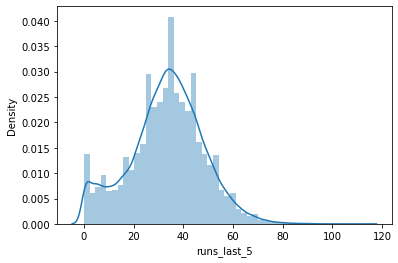

In [45]:
sb.distplot(ipl.runs_last_5)

In [46]:
ipl.wickets_last_5.nunique()

8

In [47]:
ipl.runs_last_5.value_counts()

34     2408
33     2328
35     2317
36     2289
32     2281
37     2249
38     2200
31     2143
39     2134
29     2047
40     2008
30     1988
41     1961
28     1896
42     1872
27     1804
43     1773
26     1739
44     1671
45     1658
25     1535
46     1478
24     1390
23     1322
47     1296
22     1260
48     1219
49     1147
21     1125
50     1028
51      970
19      924
20      896
1       895
52      881
0       808
17      771
53      767
16      757
18      749
15      748
5       697
54      672
2       649
4       643
55      606
13      586
11      582
14      581
12      571
9       566
6       559
8       557
7       547
56      537
10      521
57      513
58      444
59      417
3       410
60      314
61      301
62      283
63      237
64      200
65      169
66      156
68      138
67      128
69      114
70       76
71       69
72       69
73       60
74       50
75       36
76       30
77       27
79       27
80       21
81       18
78       17
83       12
87  

<AxesSubplot:xlabel='wickets_last_5', ylabel='Density'>

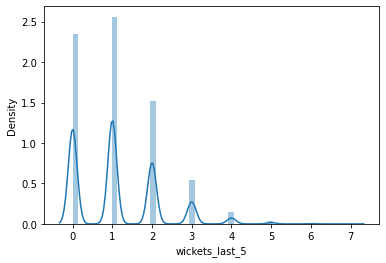

In [48]:
sb.distplot(ipl.wickets_last_5)

In [49]:
ipl.keys()

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [50]:
ipl.striker.nunique()

155

In [51]:
ipl.striker.value_counts()

4      2266
1      2188
5      2087
6      1993
10     1981
12     1949
13     1945
9      1926
8      1920
11     1913
14     1833
15     1816
16     1740
7      1701
17     1694
20     1683
19     1607
2      1594
18     1589
24     1574
23     1559
21     1487
22     1462
0      1437
25     1432
27     1383
26     1379
29     1329
3      1279
30     1244
28     1220
31     1073
32     1013
35      951
34      951
33      950
36      926
38      850
37      829
39      807
40      807
42      776
44      754
43      729
41      686
45      673
50      617
47      579
49      543
46      532
48      532
52      483
51      475
53      431
54      397
57      355
59      331
55      326
56      321
58      297
60      292
61      279
62      264
64      251
65      235
63      228
66      212
67      211
68      167
69      156
70      146
75      140
72      128
74      120
71      108
80       99
73       99
81       97
77       91
76       87
79       83
82       76
83       74
89  

<AxesSubplot:xlabel='striker', ylabel='Density'>

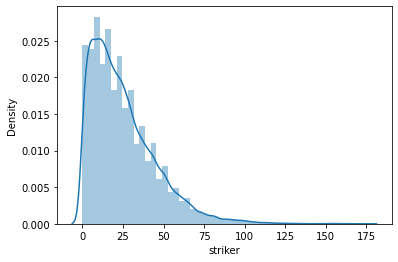

In [52]:
sb.distplot(ipl.striker)

In [53]:
ipl.total.nunique()

138

In [54]:
ipl.total.value_counts()

165    1746
178    1505
183    1495
168    1485
163    1485
164    1484
148    1472
187    1373
157    1370
160    1359
171    1254
170    1241
154    1230
162    1129
185    1125
142    1121
161    1120
172    1116
145    1115
141    1109
158    1109
181     997
191     994
156     993
159     991
138     989
177     984
152     981
190     879
184     875
150     867
119     866
173     865
189     864
126     860
136     857
129     837
205     755
174     750
139     749
140     748
153     747
192     746
166     746
143     744
134     742
175     742
146     742
147     742
132     740
188     623
195     623
182     621
112     620
155     620
133     619
130     615
149     613
135     610
124     606
209     505
180     501
176     499
179     496
151     494
120     494
186     491
115     475
198     381
196     377
208     377
169     377
125     376
144     375
167     373
207     372
194     372
137     369
118     356
111     314
226     257
212     257
116     252
231 

<AxesSubplot:xlabel='total', ylabel='Density'>

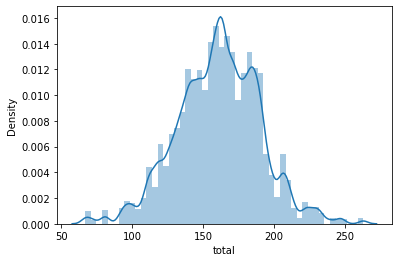

In [55]:
sb.distplot(ipl.total)

### Features Selection BAsed on Correlation and Domain.

In [56]:
ipl.drop(['date'],axis=1,inplace=True)
# Based On Domain 

In [57]:
# Based on Domain
ipl.drop(['striker','non-striker','mid'],axis=1,inplace=True)

In [58]:
# Venue is independent of the total of the match
ipl.drop(['venue'],axis=1,inplace=True)

In [59]:
ipl.drop(['batsman','bowler'],axis=1,inplace=True)
# Score is independent on batsman & a bowler

In [60]:
ipl

,mid,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
76009,617,Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,617,Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,617,Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,617,Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129


### Label Encoding.

In [61]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
ipl.bat_team=enc.fit_transform(ipl.bat_team)
ipl.bowl_team=enc.fit_transform(ipl.bowl_team)

### Skewness & Kurtosis, Z_score

In [62]:
from scipy import stats

In [63]:
print("skewness:" , stats.skew(ipl.total)) # range -1<s<1

skewness: -0.06026674047633473


In [64]:
print("kurtosis:" , stats.kurtosis(ipl.total)) # range -1<k<1

kurtosis: 0.4071669910034754


In [65]:
print("skewness:" , stats.skew(ipl))

skewness: [ 0.00463614  0.18704105  0.16123536  0.39439541  0.79160502  0.00990388
 -0.08308778  0.90109949 -0.06026674]


In [66]:
pd.DataFrame(stats.skew(ipl))

,0
0,0.004636
1,0.187041
2,0.161235
3,0.394395
4,0.791605
5,0.009904
6,-0.083088
7,0.901099
8,-0.060267


In [67]:
print("kurtosis:" , stats.kurtosis(ipl))

kurtosis: [-1.20232108 -1.09987413 -1.0831626  -0.63167222  0.17746686 -1.20790925
  0.08005127  0.72906301  0.40716699]


In [68]:
pd.DataFrame(stats.kurtosis(ipl))

,0
0,-1.202321
1,-1.099874
2,-1.083163
3,-0.631672
4,0.177467
5,-1.207909
6,0.080051
7,0.729063
8,0.407167


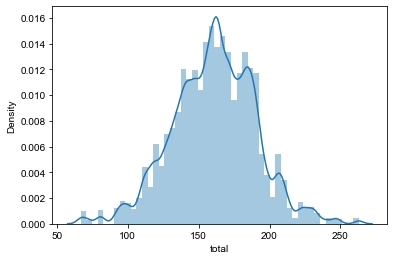

In [69]:
sb.distplot(ipl['total']) # to visualize normal_distribution
sb.set_style("whitegrid")

<AxesSubplot:ylabel='Density'>

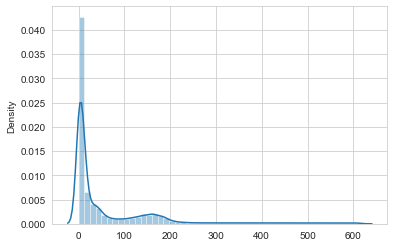

In [70]:
sb.distplot(ipl)

### To Remove Outliers.

In [71]:
# To check  the standard score is the number of standard deviations by which the value of a raw score is above or below the mean value.
z_scores=stats.zscore(ipl)
ipl_1=pd.DataFrame(z_scores)
ipl_1

,0,1,2,3,4,5,6,7,8
0,-1.726735,0.016346,1.494805,-1.513413,-1.198815,-1.677434,-2.160136,-1.063580,2.089122
1,-1.726735,0.016346,1.494805,-1.513413,-1.198815,-1.660110,-2.160136,-1.063580,2.089122
2,-1.726735,0.016346,1.494805,-1.492930,-1.198815,-1.660110,-2.093085,-1.063580,2.089122
3,-1.726735,0.016346,1.494805,-1.492930,-1.198815,-1.642787,-2.093085,-1.063580,2.089122
4,-1.726735,0.016346,1.494805,-1.492930,-1.198815,-1.625464,-2.093085,-1.063580,2.089122
...,...,...,...,...,...,...,...,...,...
76009,1.730914,0.258324,0.990466,0.944445,2.274797,1.631330,0.454843,-1.063580,-1.090796
76010,1.730914,0.258324,0.990466,1.067338,2.274797,1.648653,0.857148,-1.063580,-1.090796
76011,1.730914,0.258324,0.990466,1.087820,2.274797,1.665977,0.924198,-1.063580,-1.090796
76012,1.730914,0.258324,0.990466,1.108302,2.274797,1.683300,0.991249,-1.063580,-1.090796


In [72]:
z_score=np.abs(ipl_1)

In [73]:
filtered_entries=(z_score<3).all(axis=1)
ipl_score=ipl[filtered_entries]
ipl_score

,mid,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,1,6,12,1,0,0.1,1,0,222
1,1,6,12,1,0,0.2,1,0,222
2,1,6,12,2,0,0.2,2,0,222
3,1,6,12,2,0,0.3,2,0,222
4,1,6,12,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
76009,617,7,10,121,7,19.2,40,0,129
76010,617,7,10,127,7,19.3,46,0,129
76011,617,7,10,128,7,19.4,47,0,129
76012,617,7,10,129,7,19.5,48,0,129


In [74]:
ipl_score.shape

(74578, 9)

<AxesSubplot:ylabel='Density'>

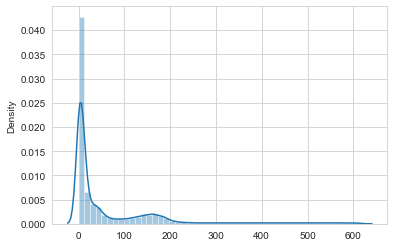

In [75]:
sb.distplot(ipl_score)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [77]:
X=ipl_score.iloc[:,:-1]
y=ipl_score.total

# MODELS.

## 1. XGBoost.

In [79]:
from xgboost import XGBRegressor

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [80]:
model = XGBRegressor(n_estimators=600, learning_rate=0.15,gamma=1000, random_state=10)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(mean_absolute_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

5.665288127756975
0.9264512297870142


In [81]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.936302
Accuracy on test set: 0.926451


<AxesSubplot:xlabel='total', ylabel='Density'>

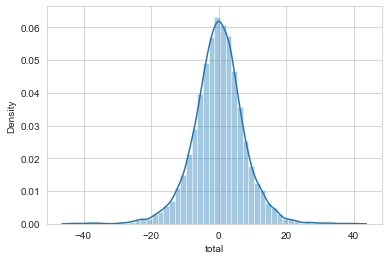

In [82]:
sb.distplot(y_test-y_predict)

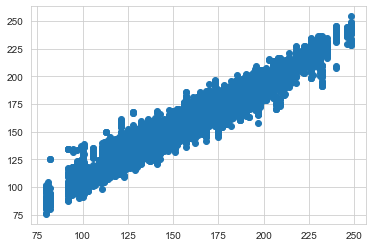

In [83]:
plt.scatter(y_test,y_predict,)

## 2. Random Forest.

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [98]:
model=RandomForestRegressor(max_features='auto',max_depth=700,n_estimators=900,min_samples_split=2,random_state=8)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)

0.9743937159505917

In [99]:
mean_absolute_error(y_test,y_predict)

2.3530644696721392

In [100]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.996542
Accuracy on test set: 0.974394


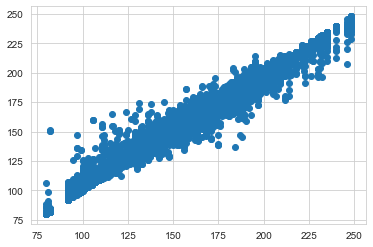

In [101]:
plt.scatter(y_test,y_predict)

<AxesSubplot:xlabel='total', ylabel='Density'>

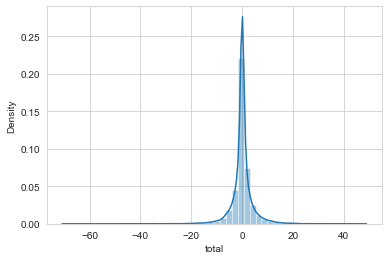

In [102]:
sb.distplot(y_test-y_predict)